In [21]:
library(raster)
library(rasterVis)
library(rgdal)
library(ggmap)
library(tidyverse)
library(knitr)

# New Packages
library(ncdf4) # to import data from netcdf format

In [22]:
# Create a folder to hold the downloaded data
dir.create("data", showWarnings = F) #create a folder to hold the data

lulc_url = "https://github.com/adammwilson/DataScienceData/blob/master/inst/extdata/appeears/MCD12Q1.051_aid0001.nc?raw=true"
lst_url = "https://github.com/adammwilson/DataScienceData/blob/master/inst/extdata/appeears/MOD11A2.006_aid0001.nc?raw=true"

# download them
download.file(lulc_url,destfile = "data/MCD12Q1.051_aid0001.nc", mode = "wb")
download.file(lst_url,destfile = "data/MOD11A2.006_aid0001.nc", mode = "wb")

In [23]:
# load data 
lulc = stack("data/MCD12Q1.051_aid0001.nc",varname="Land_Cover_Type_1")
lst = stack("data/MOD11A2.006_aid0001.nc",varname="LST_Day_1km")

[1] ">>>> WARNING <<<  attribute latitude_of_projection_origin is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute longitude_of_central_meridian is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute longitude_of_projection_origin is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute straight_vertical_longitude_from_pole is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute fa

Warning message in .getCRSfromGridMap4(atts):
"cannot process these parts of the crs:
_CoordinateAxisTypes=GeoX GeoY
horizontal_datum_name=WGS84"
Warning message in .doTime(r, nc, zvar, dim3):
"assuming a standard calender:julian"
Warning message in .doTime(st, nc, zvar, dim3):
"assuming a standard calender:julian"


[1] ">>>> WARNING <<<  attribute latitude_of_projection_origin is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute longitude_of_central_meridian is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute longitude_of_projection_origin is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute straight_vertical_longitude_from_pole is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute fa

Warning message in .getCRSfromGridMap4(atts):
"cannot process these parts of the crs:
_CoordinateAxisTypes=GeoX GeoY
horizontal_datum_name=WGS84"
Warning message in .doTime(r, nc, zvar, dim3):
"assuming a standard calender:julian"
Warning message in .doTime(st, nc, zvar, dim3):
"assuming a standard calender:julian"


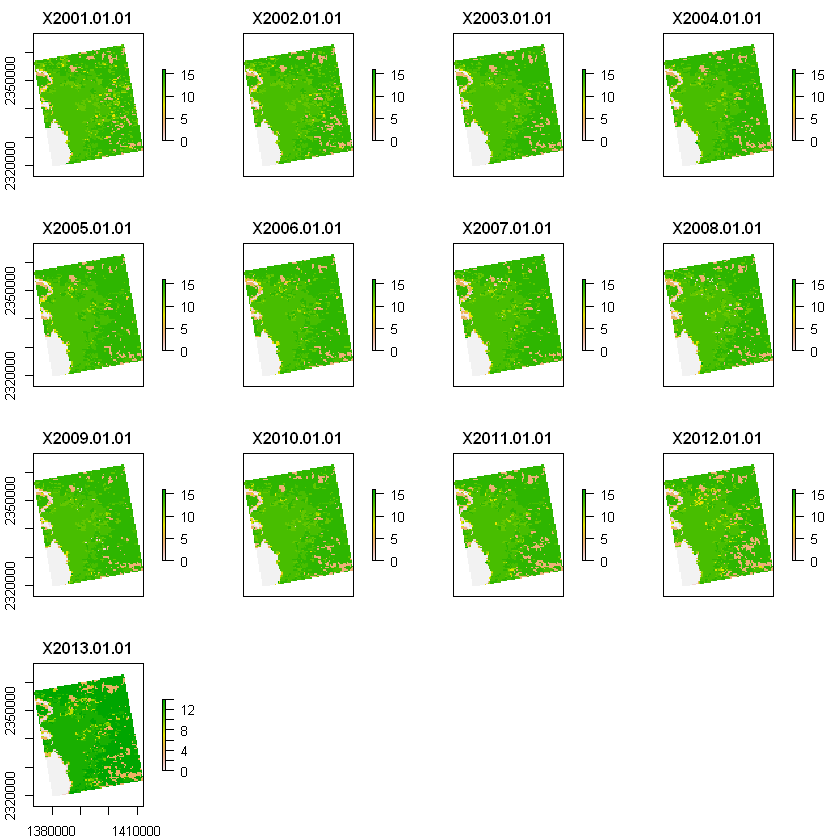

In [24]:
plot(lulc)

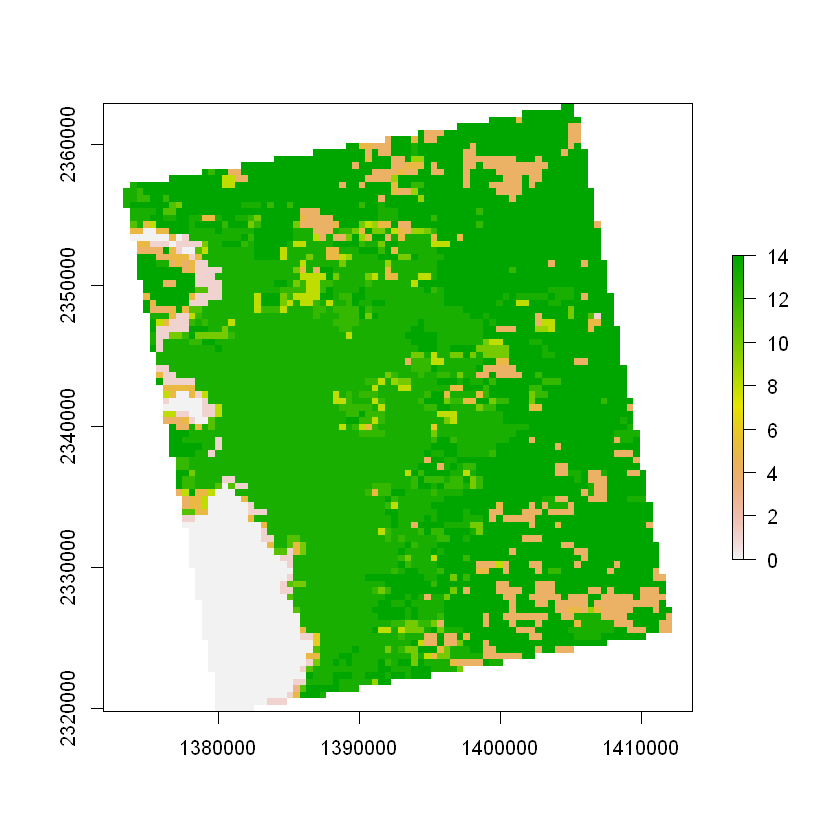

In [25]:
lulc = lulc[[13]]
plot(lulc)

In [26]:
# Assign land cover clases from MODIS website
Land_Cover_Type_1 <-  c(
    Water = 0, 
    `Evergreen Needleleaf forest` = 1, 
    `Evergreen Broadleaf forest` = 2,
    `Deciduous Needleleaf forest` = 3, 
    `Deciduous Broadleaf forest` = 4,
    `Mixed forest` = 5, 
    `Closed shrublands` = 6,
    `Open shrublands` = 7,
    `Woody savannas` = 8, 
    Savannas = 9,
    Grasslands = 10,
    `Permanent wetlands` = 11, 
    Croplands = 12,
    `Urban & built-up` = 13,
    `Cropland/Natural vegetation mosaic` = 14, 
    `Snow & ice` = 15,
    `Barren/Sparsely vegetated` = 16, 
    Unclassified = 254,
    NoDataFill = 255)


lcd = data.frame(
  ID = Land_Cover_Type_1,
  landcover = names(Land_Cover_Type_1),
  col = c("#000080","#008000","#00FF00", "#99CC00","#99FF99", "#339966", "#993366", "#FFCC99", "#CCFFCC", "#FFCC00", "#FF9900", "#006699", "#FFFF00", "#FF0000", "#999966", "#FFFFFF", "#808080", "#000000", "#000000"),
  stringsAsFactors = F)
# colors from https://lpdaac.usgs.gov/about/news_archive/modisterra_land_cover_types_yearly_l3_global_005deg_cmg_mod12c1
kable(head(lcd))



|                            | ID|landcover                   |col     |
|:---------------------------|--:|:---------------------------|:-------|
|Water                       |  0|Water                       |#000080 |
|Evergreen Needleleaf forest |  1|Evergreen Needleleaf forest |#008000 |
|Evergreen Broadleaf forest  |  2|Evergreen Broadleaf forest  |#00FF00 |
|Deciduous Needleleaf forest |  3|Deciduous Needleleaf forest |#99CC00 |
|Deciduous Broadleaf forest  |  4|Deciduous Broadleaf forest  |#99FF99 |
|Mixed forest                |  5|Mixed forest                |#339966 |

In [27]:
# convert to raster (easy)
lulc = as.factor(lulc)

# update the RAT with a left join
levels(lulc) = left_join(levels(lulc)[[1]], lcd, by = "ID")

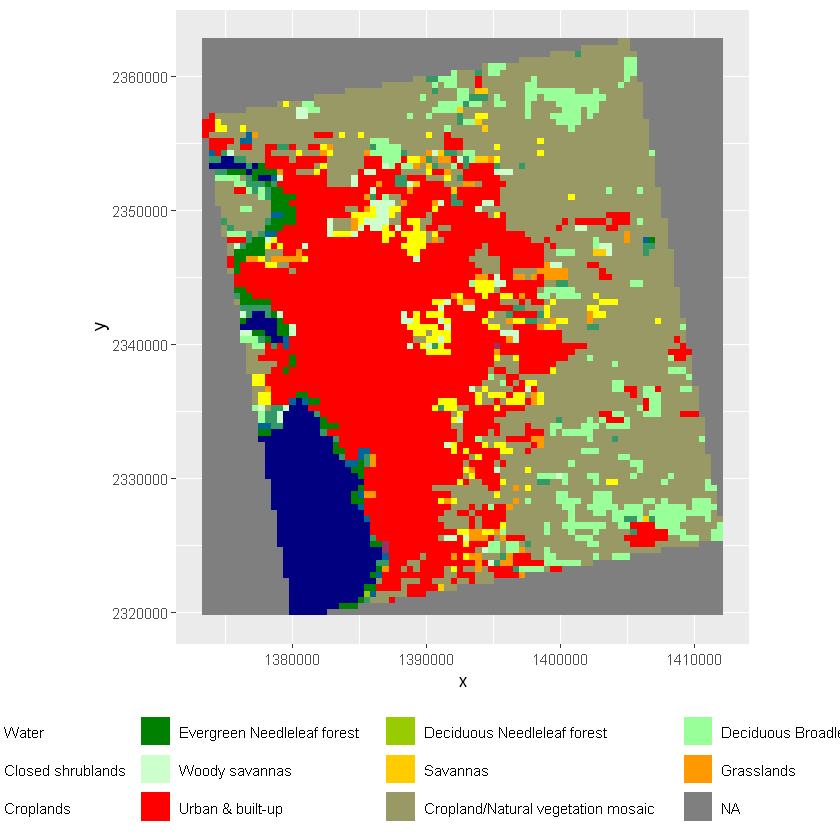

In [28]:
# plot it
gplot(lulc) +
  geom_raster(aes(fill = as.factor(value))) +
  scale_fill_manual(values = levels(lulc)[[1]]$col,
                    labels = levels(lulc)[[1]]$landcover,
                    name = "Landcover Type") +
  coord_equal() +
  theme(legend.position = "bottom")+
  guides(fill = guide_legend(ncol = 5, nrow = 3, byrow = TRUE))

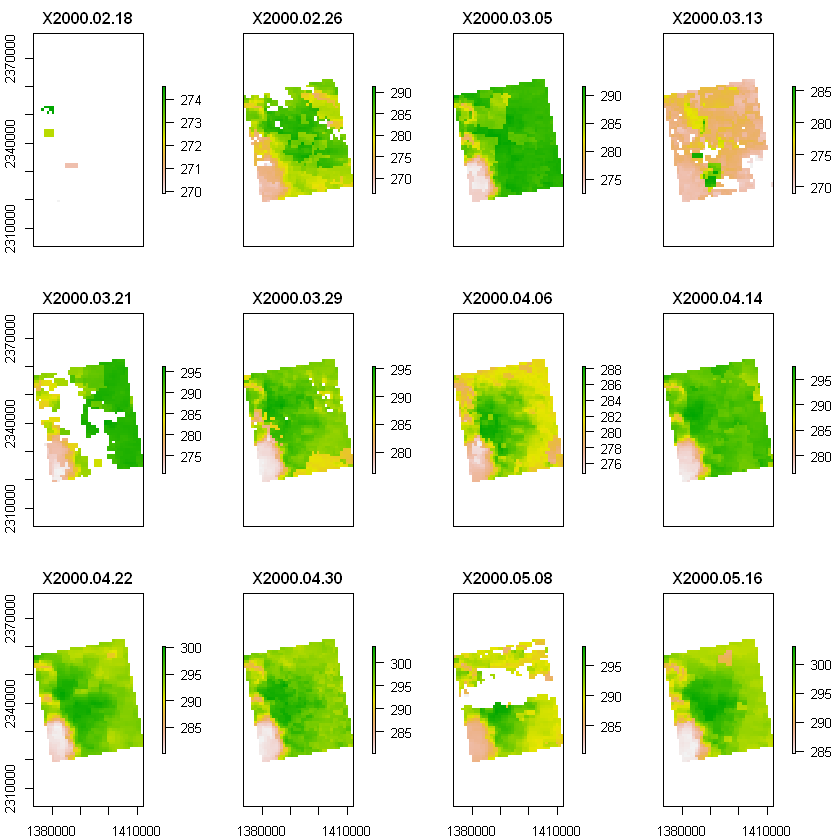

In [29]:
plot(lst[[1:12]])

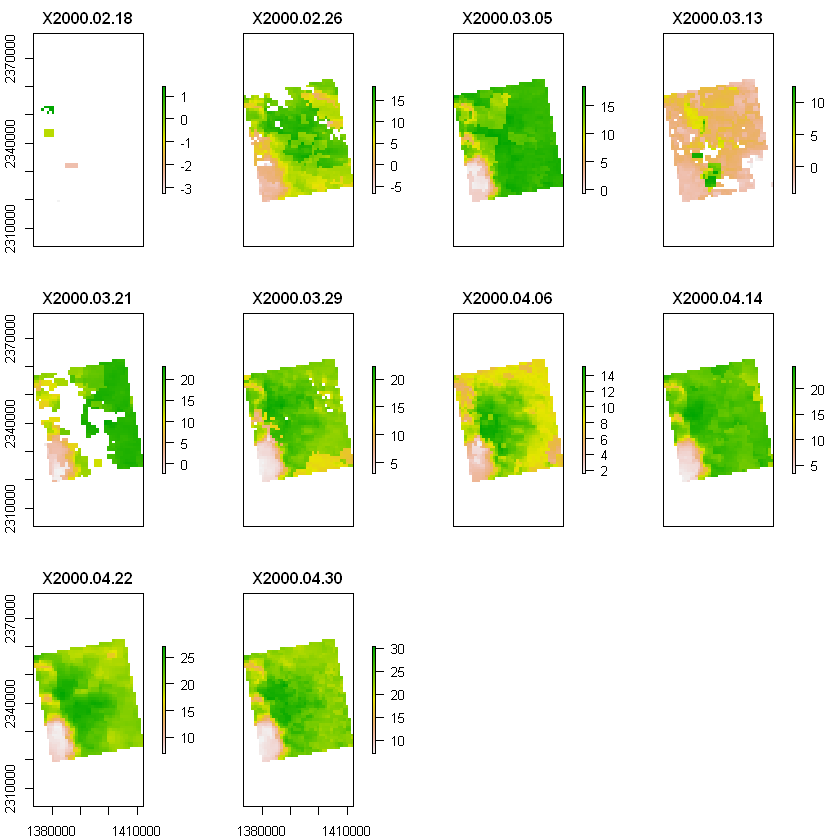

In [30]:
offs(lst) =  -273.15
plot(lst[[1:10]])

In [31]:
# The default layer names of the LST file include the date as follows
names(lst)[1:5]

[1] "X2000.02.18" "X2000.02.26" "X2000.03.05" "X2000.03.13" "X2000.03.21"

In [32]:
# Convert those values to a proper R Date format by dropping the “X” and using as.Date()
tdates = names(lst) %>%
  gsub(pattern = "X", replacement = "", .) %>% 
  as.Date("%Y.%m.%d")

names(lst) = 1:nlayers(lst)
lst = setZ(lst, tdates) # Get or set z-values

In [33]:
lw = SpatialPoints(data.frame(x = -78.791547, y = 43.007211))
projection(lw) = "+proj=longlat"
lw = lw %>% spTransform(CRSobj = crs(lst))
lw_data = raster::extract(lst, lw, buffer = 1000, fun = mean, na.rm = T) %>%
  t() %>% 
  as.data.frame() %>% 
  rownames_to_column(var = "id") %>% 
  as_tibble() %>% 
  rename(Temperature = V1) %>% 
  mutate(Date = getZ(lst))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
"Removed 82 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"k-d tree limited by memory. ncmax= 729"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"k-d tree limited by memory. ncmax= 729"
Warning message:
"Removed 82 rows containing missing values (geom_point)."
Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


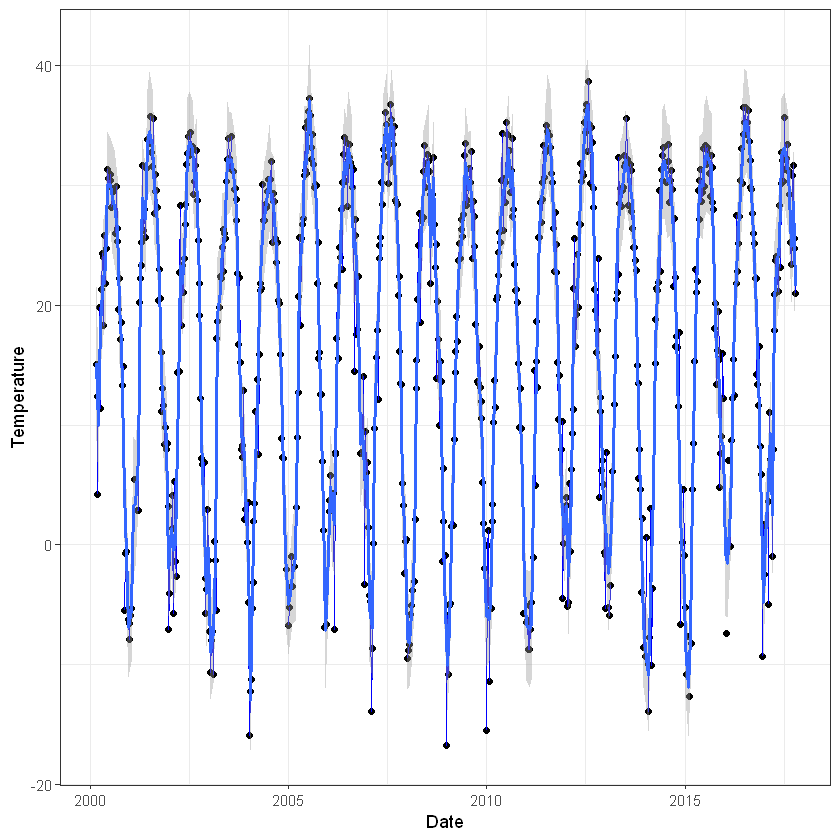

In [34]:
lw_data %>% 
  ggplot(., aes(x = Date, y = Temperature)) + 
  geom_point() +
  geom_line(color = "blue") +
  geom_smooth(n = 300, span = 0.01) +
  theme_bw()

In [35]:
tmonth = as.numeric(format(getZ(lst),"%m"))
lst_month = stackApply(lst, tmonth, fun = mean)
names(lst_month) =  month.name

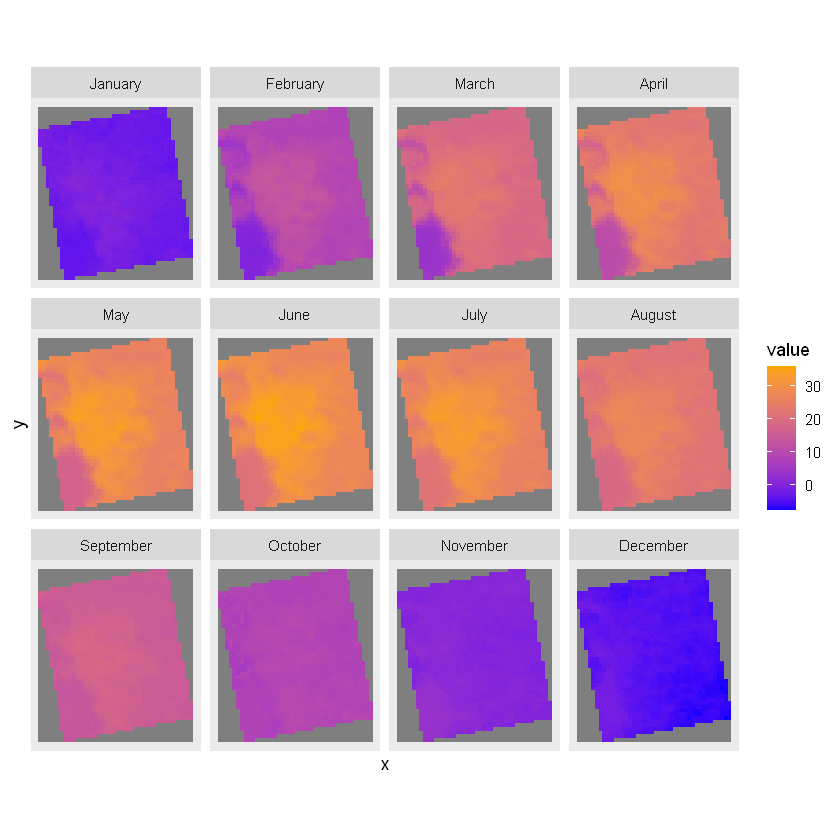

In [36]:
# plot(lst_month)
gplot(lst_month) + 
  geom_tile(aes(fill = value)) +
  facet_wrap(~ variable) +
  scale_fill_gradient(low = 'blue', high = 'orange') +
  # coord_equal() +
  coord_sf(datum = NA) 

In [37]:
cellStats(lst_month, mean) %>% 
  as.data.frame() %>% 
  rename(Mean = ".") %>% 
  kable()



|          |      Mean|
|:---------|---------:|
|January   | -2.127506|
|February  |  8.710271|
|March     | 18.172077|
|April     | 23.173591|
|May       | 26.990005|
|June      | 28.840144|
|July      | 27.358260|
|August    | 22.927727|
|September | 15.477510|
|October   |  8.329881|
|November  |  0.586179|
|December  | -4.754134|